# <center>Visualizations - Augmentation</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

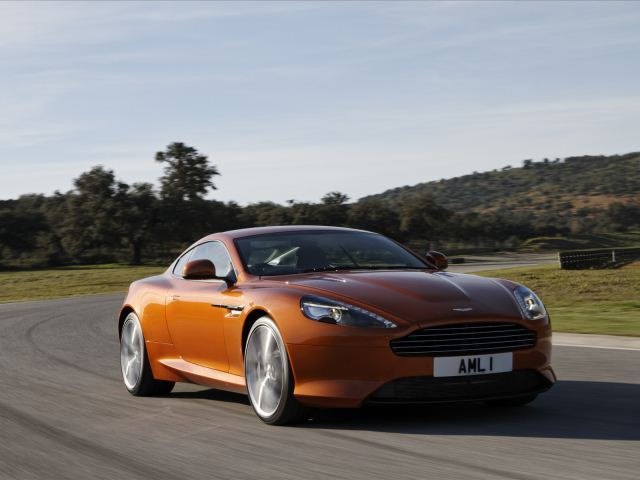

In [3]:
from IPython.display import Image
Image(filename='dataset/train_spl/11/000835.jpg', width=300,height=200) 

In [4]:
image_path = 'dataset/train_spl/11/000835.jpg'
image = np.expand_dims(plt.imread(image_path),0)

In [5]:
gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.05, shear_range=0.05, zoom_range=0.3, 
                               channel_shift_range=100., horizontal_flip=True)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [7]:
# plt.imshow(image[0])

In [8]:
aug_iter = gen.flow(image)

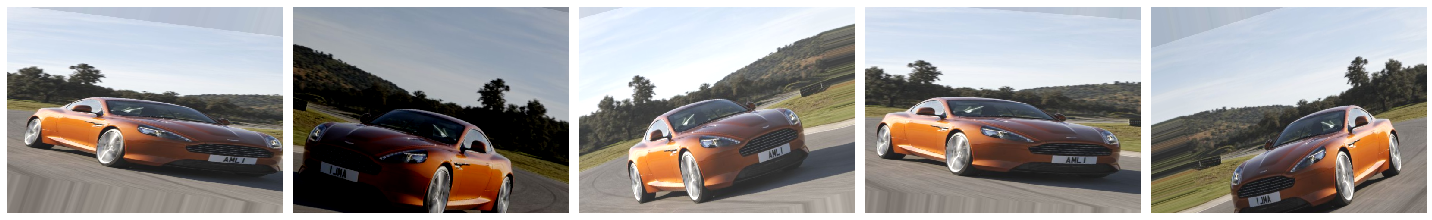

In [9]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]
plotImages(aug_images)

# <center>Visualizing Log Files</center>

In [10]:
import pandas as pd
import numpy as np
#trainingImageNet-NoMomem-NoReg.csv
#trainingImageNet-NoMomem-NoReg2.csv

#mobilenet-regularization-transfer.csv mobilenet transfer
# mobilenet-regularization-L2 regularization no augmentation
df = pd.read_csv("model_mobilenet_r2_log.csv")
df.columns = df.columns.str.strip()
df['accuracy'] = df['accuracy'].astype("float")
df['val_accuracy'] = df['val_accuracy'].astype("float")

In [11]:
#np.__version__
pd.__version__

'0.25.3'

In [12]:
df[['accuracy','val_accuracy']].plot()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

# <center>Visualizing Model Prediciton</center>

In [19]:
from CVPreClass import CVPreClass as cvpre
import tensorflow as tf
from tensorflow import keras
import imutils
import cv2
import numpy as np

In [20]:
d = cvpre.Classes_as_strings()

In [21]:
d[0]

'AM General Hummer SUV 2000'

In [29]:
#model = tf.keras.applications.MobileNet()
model = tf.keras.models.load_model('M_VGG1_checkpoint-07.hdf5')

In [30]:
imagePath= "dataset/test_spl/108/008771.jpg"
# take true label from folder path
truevalidx= int(imagePath.split(sep='/')[-2])
image = cv2.imread(imagePath)
orig = image.copy()
# resize to model input shape
orig = imutils.resize(orig, width=224,height=224)
orig =cv2.resize(image,(224,224),interpolation=cv2.INTER_AREA)
#expand image as a set of 1 image
image = np.expand_dims(orig, axis=0)

In [31]:
preds = model.predict(image)[0]
#take the first 5 predictions. will be used to calculate rank5 accuracy
idxs = np.argsort(preds)[::-1][:5]

 # show the true class label
#print("[INFO] actual={}".format(le.inverse_transform(target)))
 # format and display the top predicted class label
label = d[idxs[0]]
label = label.replace(":", " ")
trueval = d[truevalidx]




label = "{}: {:.2f}%".format(label, preds[idxs[0]] * 100)
#write predicted label and true label of image
q= cv2.putText(orig, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,0.4, (0, 255, 0), 1)
q= cv2.putText(orig, trueval, (10, 60), cv2.FONT_HERSHEY_SIMPLEX,0.4, (0, 0, 255), 1)

UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node block1_conv1_1/Conv2D}}]]
	 [[dense_3_1/Softmax/_10875]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node block1_conv1_1/Conv2D}}]]
0 successful operations.
0 derived errors ignored.

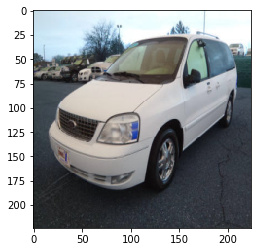

In [32]:
#cv2.imshow("Image", orig)
#cv2.imwrite("out.jpg", orig)

#cv2.waitKey(0)



plt.imshow(orig)
plt.show()